# Generate visual diagrams using results.csv

> ⚠️ A `results.csv` file must be present! Run the performance test(s) to generate this file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
"""Load results into a dataframe and specify the columns we care about."""

# Replace results.csv with your results file
df = pd.read_csv("results.csv")
COLUMNS = [
    "NAME",
    "QUALITI SCRIPTS DURATION",
    "FIRST CONTENTFUL PAINT",
    "PAGE LOAD TIME",
]

In [3]:
"""Add a TEST ID column to use in graphs and display the first 5 rows."""

df["TEST ID"] = [x for x in range(0, len(df))]
df.head()

,NAME,QUALITI SCRIPTS DURATION,TOTAL SCRIPTS DURATION,FIRST CONTENTFUL PAINT,PAGE LOAD TIME,TEST ID
0,test_web_performance_metrics[1-10],2483.0,43498.4,7107.0,9671.6,0
1,test_web_performance_metrics[2-10],2141.0,45650.3,6665.0,9575.5,1
2,test_web_performance_metrics[3-10],2118.0,27123.6,9376.6,8016.8,2
3,test_web_performance_metrics[4-10],2229.9,24608.9,8791.6,7608.5,3
4,test_web_performance_metrics[5-10],2527.5,30801.1,8409.5,7332.0,4


<Figure size 7200x7200 with 0 Axes>

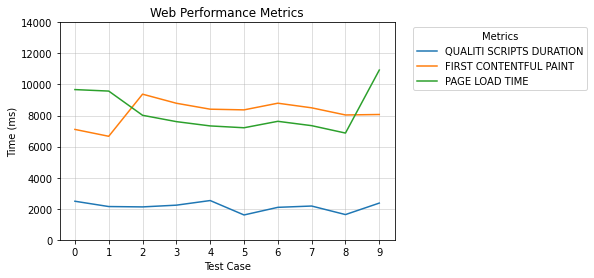

In [4]:
"""Create Series Line Graph with matplotlib."""

plt.figure(figsize=(100, 100))
df[COLUMNS].plot()

plt.title("Web Performance Metrics")
plt.xlabel("Test Case")
plt.ylabel("Time (ms)")
plt.legend(loc='best', title='Metrics', bbox_to_anchor=(1.04,1))

plt.grid(alpha=0.5)    
plt.yticks(range(0, 15000, 2000))
plt.xticks(range(0, len(df)))

plt.show()

In [5]:
""" We can graph on a single data point."""
import plotly.express as px

fig = px.bar(df, x='TEST ID', y='PAGE LOAD TIME')
fig.show()

In [6]:
"""We can graph on multiple data points"""
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Qualiti Scripts Duraction (ms)', x=df['TEST ID'], y=df['QUALITI SCRIPTS DURATION']),
    go.Bar(name='First Contentful Paint (ms)', x=df['TEST ID'], y=df['FIRST CONTENTFUL PAINT']),
    go.Bar(name='Page Load Time (ms)', x=df['TEST ID'], y=df['PAGE LOAD TIME']),
])

fig.update_layout(barmode='group', title_text='Web Performance Metrics')
fig.show()